In [624]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [625]:
#merge two dataframe

city_data = pd.read_csv('../raw_data/city_data.csv')
ride_data = pd.read_csv('../raw_data/ride_data.csv')

pyber_df = pd.merge(city_data,ride_data, on='city', how='outer')
pyber_df = pyber_df.dropna(how='any')
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [626]:
#Gather information based on the city
pyber_city_df = pyber_df.groupby(['city'])

#Average Fare Per City
avg_fare_per_city = pyber_city_df['fare'].mean()

#Total No of Rides Per City
rides_per_city = pyber_city_df['ride_id'].count()

#Total No of Drivers Per City
drivers_per_city = pyber_city_df['driver_count'].sum()

#City Types
city_type = pyber_city_df['type'].unique().str.get(0)


In [627]:
#Create a Data Frame based on city types
pyber_type = pd.DataFrame({'City Types': city_type, 'Total Number of Rides (Per City)': rides_per_city, 'Average Fare ($)': avg_fare_per_city, 'Total Number of Drivers Per City': drivers_per_city })


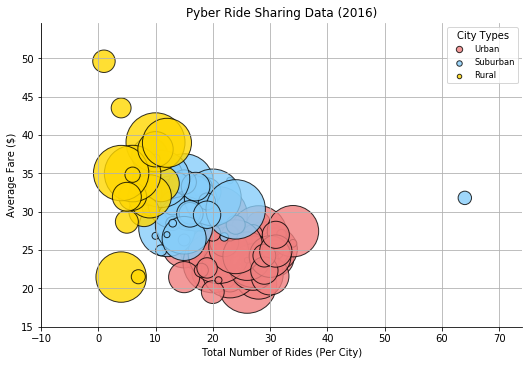

In [628]:
#Build Bubble Plot using seaborn library

z=2*pyber_type['Total Number of Drivers Per City']
sn_plot = sns.lmplot(x="Total Number of Rides (Per City)", y="Average Fare ($)",  hue = 'City Types', data=pyber_type, fit_reg=False,
           legend=True, legend_out=False, aspect=1.5, scatter_kws = {'s':z,'alpha':0.8, 'linewidths':1, 'edgecolor':'black', 'marker':'o'}, 
                     palette=dict(Urban="lightcoral", Suburban="lightskyblue", Rural="gold"))

#Set Graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlim(-10, pyber_type['Total Number of Rides (Per City)'].max() + 10)
plt.ylim(15,pyber_type['Average Fare ($)'].max() + 5  )
plt.grid(True)


# Add legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [20]

#Save Bubble Plot
sn_plot.savefig('/tmp/Pyber.png')

#Display Bubble Plot
plt.show()

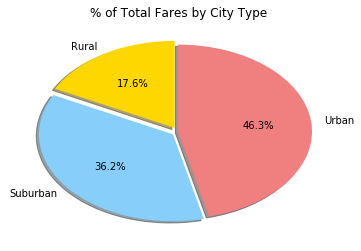

In [629]:
#Total Fare By City Type Pie Plot

pyber_type = pyber_type.groupby(['City Types'])
Fare_by_city_type = pyber_type['Average Fare ($)'].sum()
label = Fare_by_city_type.keys()

#set pie plot title and other parameter
plt.title("% of Total Fares by City Type")
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0)

#Create a Pie Plot
plt.pie(Fare_by_city_type, explode=explode, colors=colors, autopct="%1.1f%%", labels=label, shadow=True, startangle=90)

#save pie chart
plt.savefig('/tmp/fare_by_city_type.png')

#Display Pie Chart
plt.show()

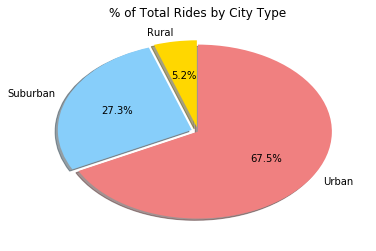

In [630]:
#Total Rides By City Type Pie Plot

Rides_by_city_type = pyber_type['Total Number of Rides (Per City)'].sum()
label = Rides_by_city_type.keys()

#set pie plot title and other parameter
plt.title("% of Total Rides by City Type")
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0)

#Create a Pie Plot
plt.pie(Rides_by_city_type, explode=explode, colors=colors, autopct="%1.1f%%", labels=label, shadow=True, startangle=90)

#save pie chart
plt.savefig('/tmp/rides_by_city_type.png')

#Display Pie Chart
plt.show()

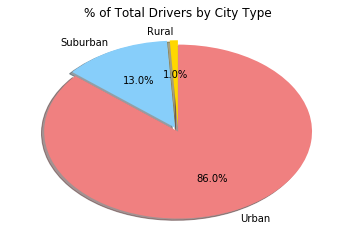

In [631]:
#Total Drivers By City Type Pie Plot

Drivers_by_city_type = pyber_type['Total Number of Drivers Per City'].sum()
label = Drivers_by_city_type.keys()

#set pie plot title and other parameter
plt.title("% of Total Drivers by City Type")
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0)

#Create a Pie Plot
plt.pie(Drivers_by_city_type, explode=explode, colors=colors, autopct="%1.1f%%", labels=label, shadow=True, startangle=90)

#save pie chart
plt.savefig('/tmp/drivers_by_city_type.png')

#Display Pie Chart
plt.show()